In [4]:
import cv2
import numpy as np
import librosa
import soundfile
import os
import pickle
import glob
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [2]:
emotions = {
    '01':'neutral',
    '02':'calm',
    '03':'happy',
    '04':'sad',
    '05':'angry',
    '06':'fearful',
    '07':'disgust',
    '08':'surprised'
}

observed_emotions = {"calm", "happy", "fearful", "disgust"}

In [30]:
x, y = [], []
for file in glob.glob(os.getcwd() + "\\data\\Actor_*\\*.wav"):
    name = os.path.basename(file)
    emotion = emotions[name.split("-")[2]]
    if emotion not in observed_emotions:
        continue
    feature = extract_feature(file, mfcc=True, chroma=True, mel=True)
    x.append(feature)
    y.append(emotion)
x_train, x_test, y_train, y_test = train_test_split(np.array(x), y, test_size=0.2, random_state=22)

In [31]:
def extract_feature(file, mfcc=False, chroma=False, mel=False):
    with soundfile.SoundFile(file) as sf:
        X = sf.read(dtype="float32")
        sample_rate = sf.samplerate

        if chroma:
            stft = np.abs(librosa.stft(X))
        result = np.array([])

        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X,
                                                 sr=sample_rate, 
                                                 n_mfcc=40).T, 
                                                 axis=0)

        if chroma:
            chroma = np.mean(librosa.feature.chroma_stft(S=stft,
                                                         sr=sample_rate).T,
                                                         axis=0)
            result = np.hstack((result, chroma))
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(X,
                                                        sr=sample_rate).T,
                                                        axis=0)
            result = np.hstack((result, mel))
        return result

In [32]:
x_train.shape

(614, 140)

In [33]:
x_test.shape

(154, 140)

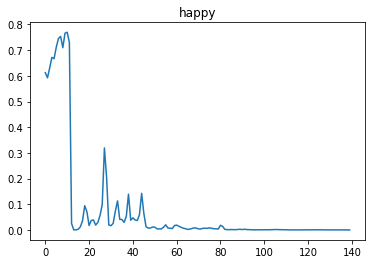

In [34]:
import matplotlib.pyplot as plt

plt.plot(x_train[33])
plt.title(y_train[33])
plt.show()

In [35]:
model = MLPClassifier(alpha=0.01,
                     batch_size=256,
                     epsilon=1e-08,
                     hidden_layer_sizes=(300,),
                     learning_rate='adaptive',
                     max_iter=500)

In [36]:
model.fit(x_train, y_train)

R:\Work\Anacond\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.01, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(300,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [37]:
y_pred = model.predict(x_test)

In [38]:
acc = accuracy_score(y_test, y_pred)
round(acc*100, 2)

57.14

That's all.
<!-- link - https://data-flair.training/blogs/python-mini-project-speech-emotion-recognition/ -->